# Project on Data Sciences and Machine Learning

## Model Training and Fitting

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split #1

from sklearn.preprocessing import StandardScaler #1
from sklearn.tree import  DecisionTreeClassifier #1
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier #1
#from sklearn.GBm import GBC #1
from sklearn.neighbors import KNeighborsClassifier #1

# import various functions from sklearn 


from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score, recall_score, precision_score #1
from sklearn.metrics import classification_report , roc_curve, auc #1
from sklearn.metrics import confusion_matrix #1
from sklearn.metrics import roc_curve #1



# import function to perform feature selection
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings("ignore")


### Model Fitting

In [104]:
df_model = pd.read_csv('diabetic_data_cleanedOH.csv')

In [105]:
df_model.shape

(1514, 97)

In [106]:
X = df_model.drop('readmitted',axis=1)

y = df_model['readmitted']

train_test_split from sklearn.model_selection is a function that splits arrays or matrices into random train and test subsets. It is a fundamental tool in machine learning for evaluating model performance on unseen data, preventing overfitting, and ensuring the model generalizes well.
X: The feature dataset.
y: The target variable dataset.
test_size: Proportion of the dataset to include in the test split (e.g., 0.2 for 20%).
random_state: Seed for the random number generator to ensure reproducibility.

In [107]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

StandardScaler from scikit-learn is a preprocessing technique used to standardize numerical features 
by removing the mean and scaling to unit variance. This transformation centers the data around zero with a 
standard deviation of one, following the formula: z = (x - u) / s where x is the original value, u is the mean of the training samples, 
and s is the standard deviation of the training samples. 
fit(data):
This method calculates the parameters needed for transformation, such as the mean and standard deviation for scaling or the minimum and maximum values for normalization.
transform(data):
This method applies the transformation to the data using the parameters calculated in the fit() step. 
fit_transform(data):
This method performs both fit() and transform() on the same data. It first calculates the transformation parameters and then applies the transformation to the data.

In [108]:
SC = StandardScaler()

X_train_scaled = pd.DataFrame(SC.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(SC.transform(X_test),columns=X_test.columns)

In [109]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1211, 96), (303, 96), (1211,), (303,))



Results
                      Accuracy       MSE        R2
Decision Tree         0.775578  0.224422 -1.764895
Random Forest         0.910891  0.089109 -0.097826
Gradient Boosting     0.910891  0.089109 -0.097826
KNeighborsClassifier  0.910891  0.089109 -0.097826


Conclusion

The model with the highest accuracy is: Random Forest
The model with the highest R2 is: Random Forest
The model with the Lowest MSE is: Random Forest




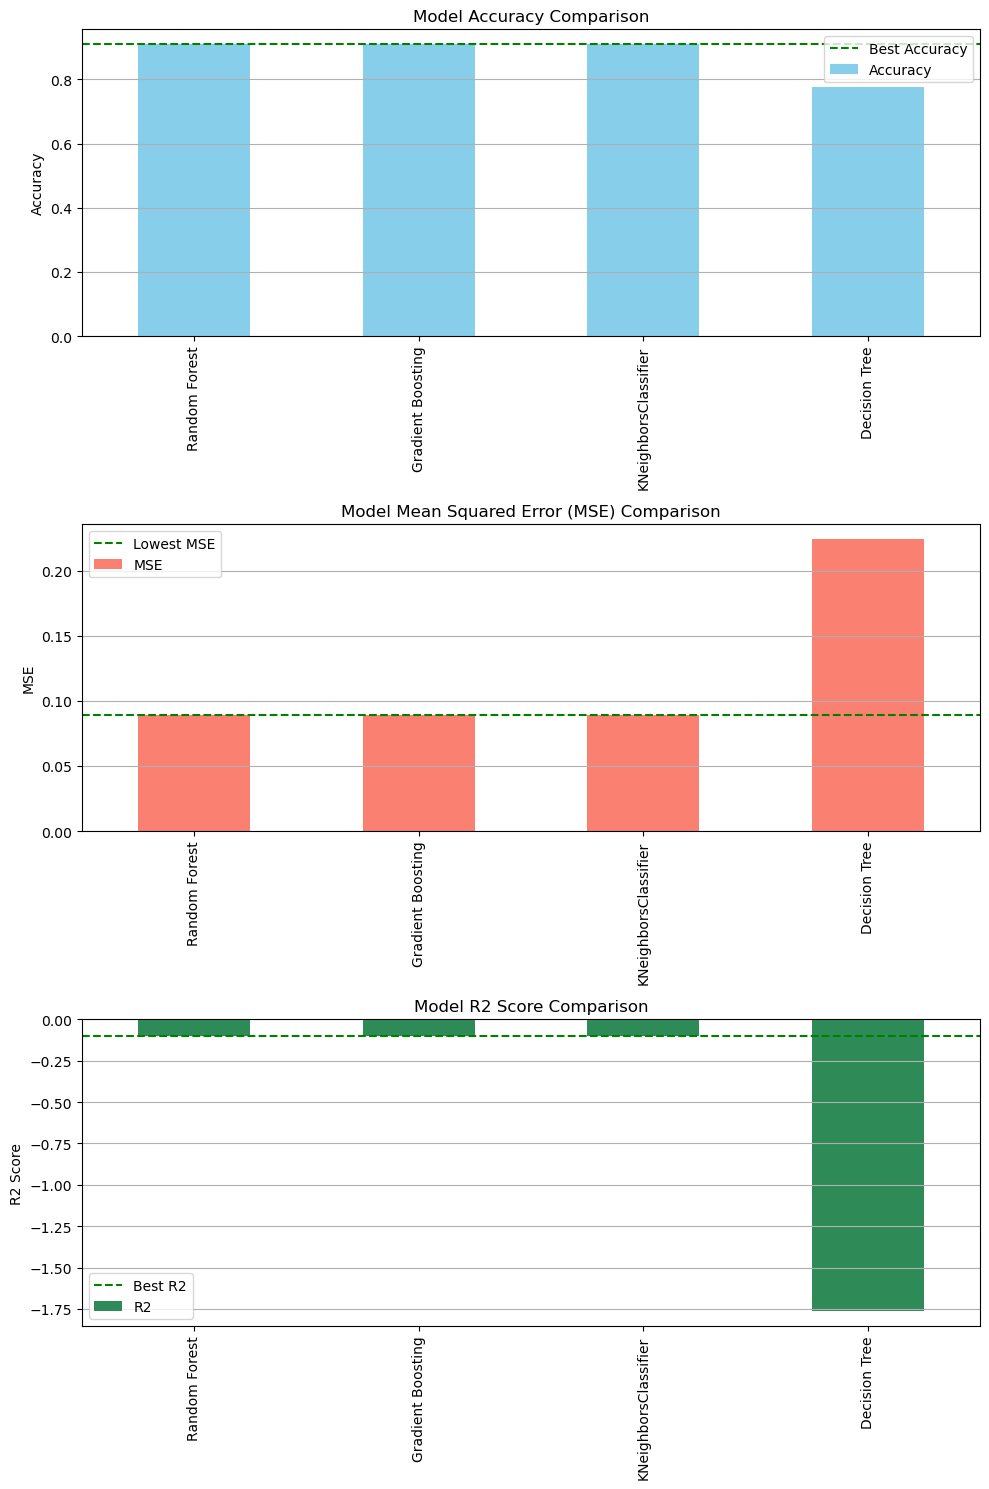

In [110]:
# Train and evaluate each model
results = {}

# Define models
models = {


    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier()

}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test_scaled)

    #print(y_pred)


    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = accuracy_score(y_test.astype(int), y_pred.astype(int))


    results[name] = {
        'Accuracy': accuracy,
        'MSE': mse,
        'R2': r2
    }


# Display the results
results_df = pd.DataFrame(results).T #Transpose
print()
print()
print("Results")
print(results_df)

print()
print()
print('Conclusion')
print()
minMSE=min(results_df["MSE"])
maxR2=max(results_df["R2"])
minMSEModel=results_df.loc[results_df['MSE'] == minMSE]
maxR2Model=results_df.loc[results_df['R2'] == maxR2]

max_accuracy_model = max(results, key=lambda name: results[name]['Accuracy'])
max_r2_model = max(results, key=lambda name: results[name]['R2'])
min_MSE_model = min(results, key=lambda name: results[name]['MSE'])


print(f"The model with the highest accuracy is: {max_accuracy_model}")
print(f"The model with the highest R2 is: {max_r2_model}")
print(f"The model with the Lowest MSE is: {min_MSE_model}")
print()
print()

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Accuracy plot
results_df.sort_values("Accuracy", ascending=False).plot(kind='bar', y='Accuracy', ax=axes[0], color='skyblue')
axes[0].set_title('Model Accuracy Comparison')
axes[0].set_ylabel('Accuracy')
axes[0].grid(axis='y')
axes[0].axhline(results[max_accuracy_model]['Accuracy'], color='green', linestyle='--', label='Best Accuracy')
axes[0].legend()

# MSE plot
results_df.sort_values("MSE", ascending=True).plot(kind='bar', y='MSE', ax=axes[1], color='salmon')
axes[1].set_title('Model Mean Squared Error (MSE) Comparison')
axes[1].set_ylabel('MSE')
axes[1].grid(axis='y')
axes[1].axhline(results[min_MSE_model]['MSE'], color='green', linestyle='--', label='Lowest MSE')
axes[1].legend()

# R2 plot
results_df.sort_values("R2", ascending=False).plot(kind='bar', y='R2', ax=axes[2], color='seagreen')
axes[2].set_title('Model R2 Score Comparison')
axes[2].set_ylabel('R2 Score')
axes[2].grid(axis='y')
axes[2].axhline(results[max_r2_model]['R2'], color='green', linestyle='--', label='Best R2')
axes[2].legend()

plt.tight_layout()
plt.show()

In [111]:
# Calculating prevalence of patients readmitted within 30 days
def calc_prev(
    target: np.ndarray
)->float:
  return sum(target)/len(target)

In [112]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
#def calc_specificity(y_actual, y_pred, thresh):
#    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def calc_scores(y_actual, y_pred, thresh):

    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)
    
    
    #print('AUC: %.3f'%auc)
    #print('accuracy: %.3f'%accuracy)
    #print('recall: %.3f'%recall)
    #print('precision: %.3f'%precision)
    #print('specificity: %.3f'%specificity)
    #print('prevalence: %.3f'%calc_prev(y_actual))
    #print(' ')
    return auc, accuracy, recall, precision, specificity
     

thresh = 0.5

In [113]:
RF = RandomForestClassifier()

RF.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [114]:
y_pred = RF.predict(X_test)

In [115]:
confusion_matrix(y_test.astype(int), y_pred.astype(int))

array([[276,   0],
       [ 27,   0]], dtype=int64)

In [116]:
from sklearn.metrics import classification_report

print(classification_report(y_test.astype(int), y_pred.astype(int)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       276
           1       0.00      0.00      0.00        27

    accuracy                           0.91       303
   macro avg       0.46      0.50      0.48       303
weighted avg       0.83      0.91      0.87       303



In [117]:
import imblearn
#Using SMOTE to handle Imbalanced Data.
from imblearn.over_sampling import SMOTE

In [118]:
oversample = SMOTE()

X,y = oversample.fit_resample(X,y)

In [119]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [120]:

RF.fit(X_train,y_train)

RandomForestClassifier()

In [121]:
RF.score(X_train,y_train),RF.score(X_test,y_test)

(0.9995495495495496, 0.9244604316546763)

In [122]:
y_pred = RF.predict(X_test)

In [123]:
confusion_matrix(y_test.astype(int), y_pred.astype(int))

array([[269,  24],
       [ 18, 245]], dtype=int64)

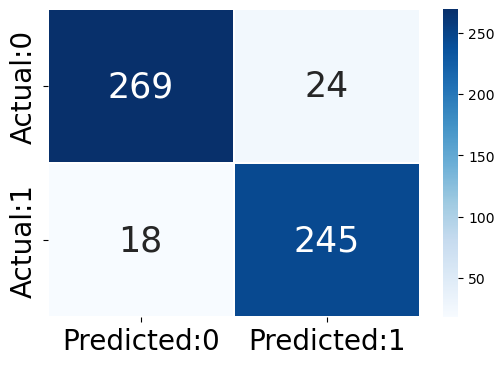

In [124]:
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test.astype(int), y_pred.astype(int))
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
#sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap =['lightskyblue'],  linewidths = 0.1, annot_kws = {'size':20})
sns.heatmap(conf_matrix, annot = True, fmt = 'g', cmap ='Blues',  linewidths = 0.1, annot_kws = {'size':25}, )
plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

In [125]:
print(classification_report(y_test.astype(int), y_pred.astype(int)))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       293
           1       0.91      0.93      0.92       263

    accuracy                           0.92       556
   macro avg       0.92      0.92      0.92       556
weighted avg       0.92      0.92      0.92       556



In [126]:
TP=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TN=cm[1,1]

In [127]:
CF_Accuracy= (TP+TN) / (TP+TN+FP+FN)
#CF_Accuracy=(8304+7915) / (8304+797+1066+7915)
CF_Accuracy

0.9244604316546763

In [128]:
CF_Precision=TP / (TP+FP)
CF_Precision

0.9180887372013652

In [129]:
CF_Recall = TP / (TP+FN)
CF_Recall

0.9372822299651568

In [130]:
CF_F1Score= 2 * ((CF_Precision * CF_Recall) / (CF_Precision+CF_Recall))
CF_F1Score

0.9275862068965518

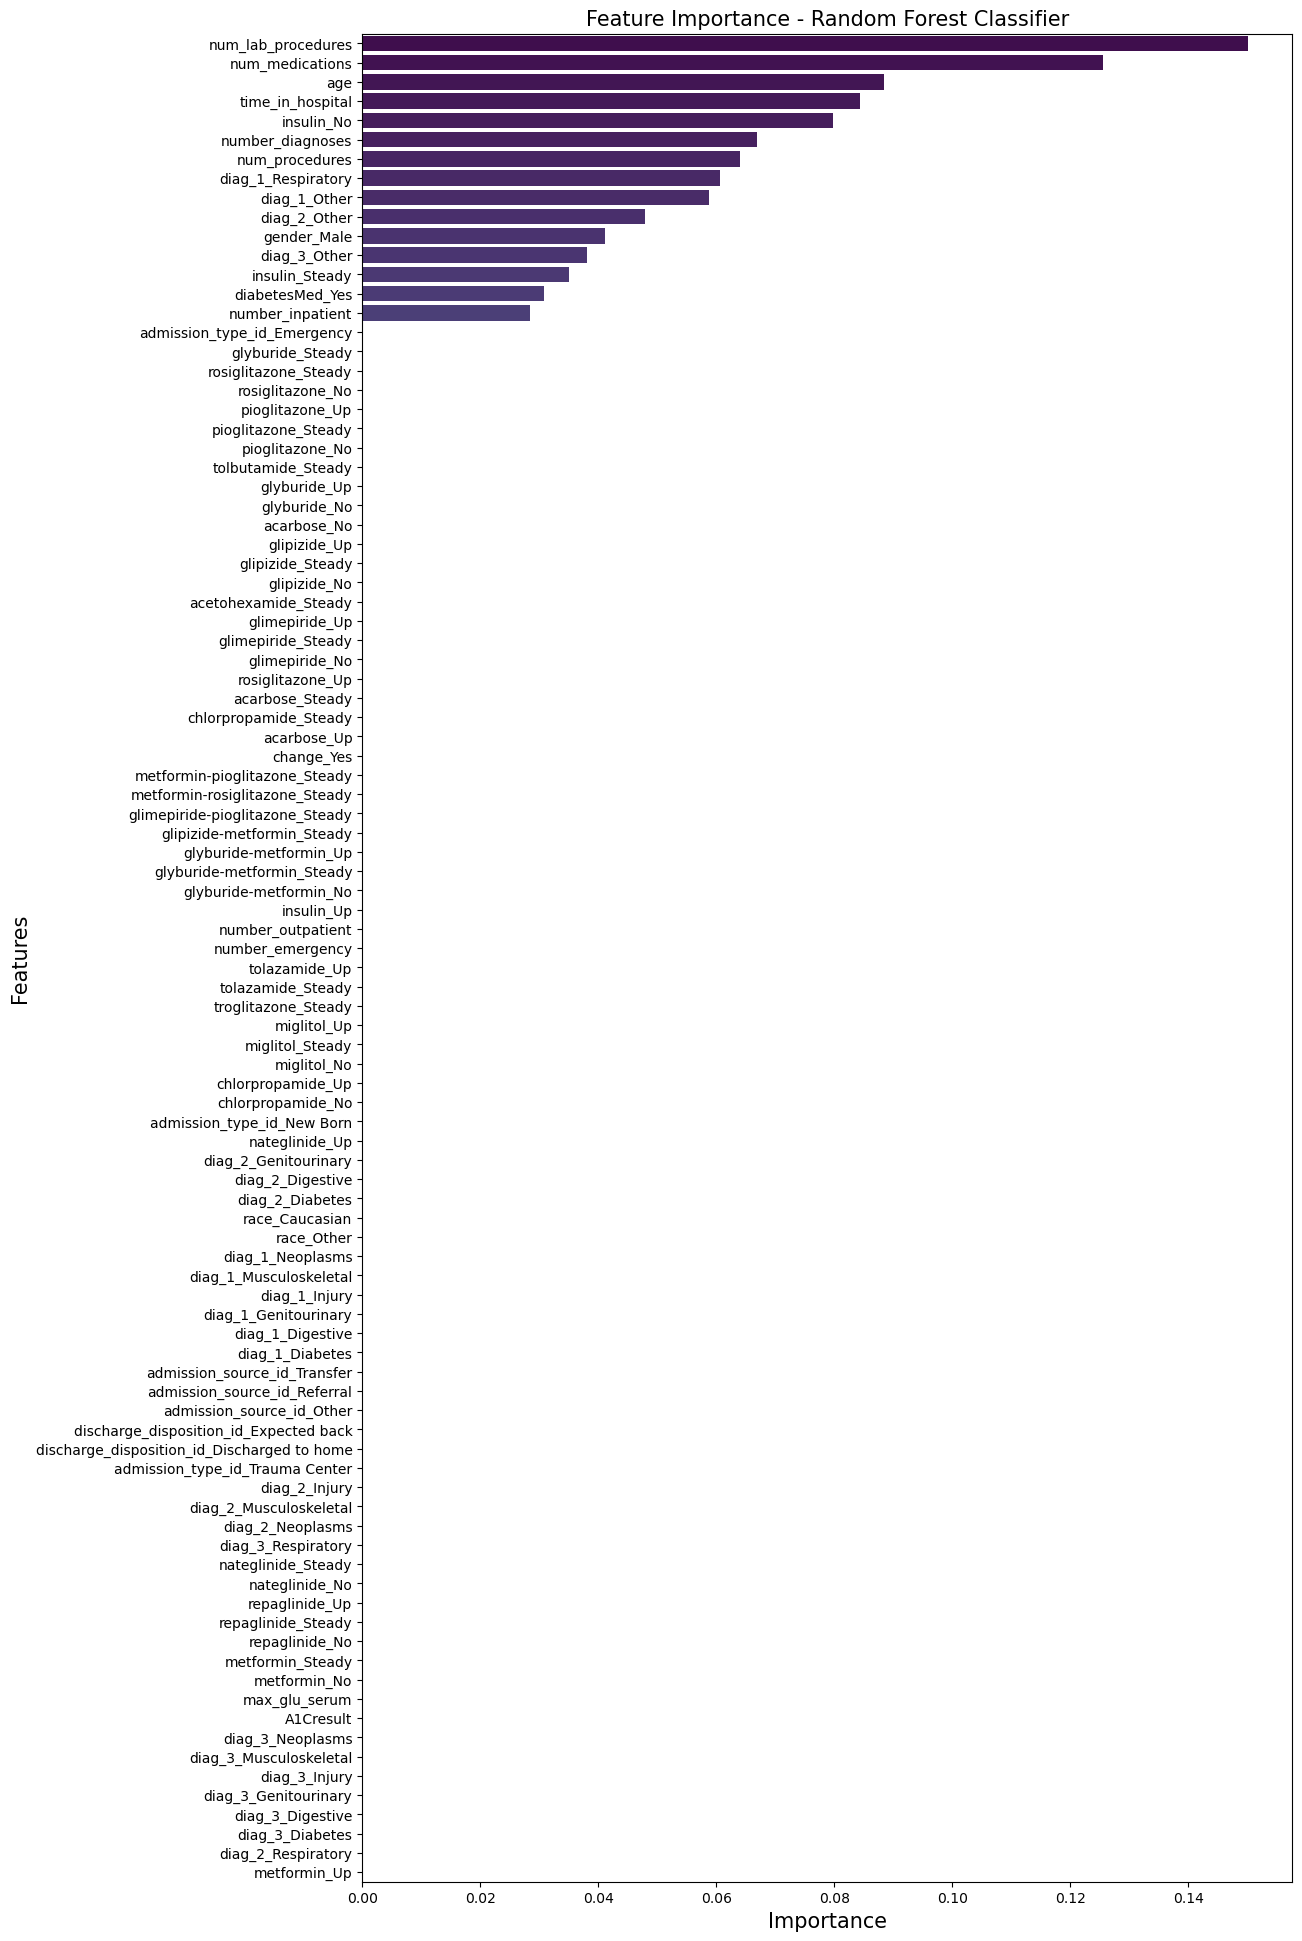

                Features  Importance
2     num_lab_procedures    0.150088
4        num_medications    0.125593
0                    age    0.088410
1       time_in_hospital    0.084346
84            insulin_No    0.079839
..                   ...         ...
40  diag_3_Genitourinary    0.000000
39      diag_3_Digestive    0.000000
38       diag_3_Diabetes    0.000000
37    diag_2_Respiratory    0.000000
48          metformin_Up    0.000000

[96 rows x 2 columns]


In [131]:
important_features = pd.DataFrame({'Features': X_train.columns,
                                   'Importance': RF.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
plt.figure(figsize=(12,24))
sns.barplot(x = 'Importance', y = 'Features', data = important_features, palette='viridis')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance - Random Forest Classifier', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

print(important_features)

In [132]:
y_proba=RF.predict_proba(X_test)[:, 1]

In [133]:
from sklearn.metrics import roc_curve, roc_auc_score
auc = roc_auc_score(y_test, y_proba)
print(f"AUC Score: {auc:.4f}")

AUC Score: 0.9743


In [134]:
Analysis = {}
name='RandomForestClassifier'
auc,accuracy,recall,precision, specificity = calc_scores(y_test,y_proba, thresh)
preval=calc_prev(y_test)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
Analysis[name] = {
    'auc_score':auc,
    'Accuracy': accuracy,
    'Recall':recall_score,
    'Precision':precision,
    'Specificity':specificity,
    'Prevalence':preval,
    'fpr':fpr,
    'tpr':tpr
    }

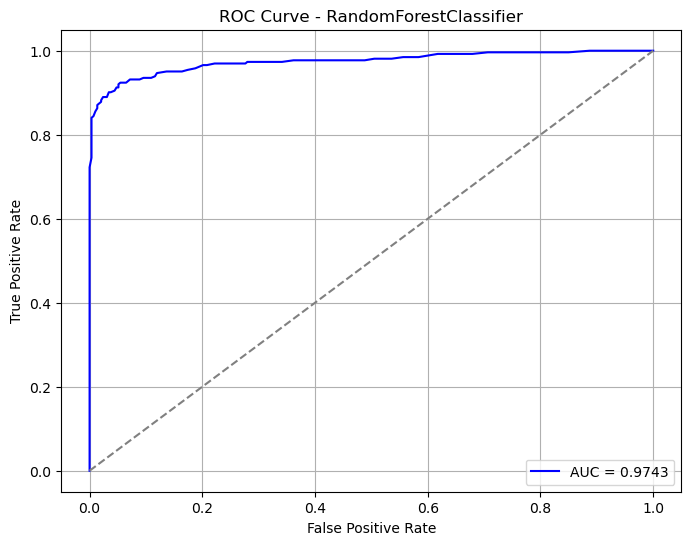

In [135]:

import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve - " + name)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Gradient Boosting

In [136]:
df_model = pd.read_csv('diabetic_data_cleanedOH.csv')

X = df_model.drop('readmitted',axis=1)
y = df_model['readmitted']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

SC = StandardScaler()

X_train_scaled = pd.DataFrame(SC.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(SC.transform(X_test),columns=X_test.columns)

GB = GradientBoostingClassifier()
GB.fit(X_train_scaled,y_train)

y_pred = GB.predict(X_test)

confusion_matrix(y_test.astype(int), y_pred.astype(int))





array([[275,   1],
       [ 27,   0]], dtype=int64)

In [137]:
from sklearn.metrics import classification_report
print(classification_report(y_test.astype(int), y_pred.astype(int)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       276
           1       0.00      0.00      0.00        27

    accuracy                           0.91       303
   macro avg       0.46      0.50      0.48       303
weighted avg       0.83      0.91      0.87       303



In [138]:
import imblearn
#Using SMOTE to handle Imbalanced Data.
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X,y = oversample.fit_resample(X,y)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

GB.fit(X_train,y_train)

GB.score(X_train,y_train),GB.score(X_test,y_test)

y_pred = GB.predict(X_test)

confusion_matrix(y_test.astype(int), y_pred.astype(int))


array([[243,  50],
       [ 32, 231]], dtype=int64)

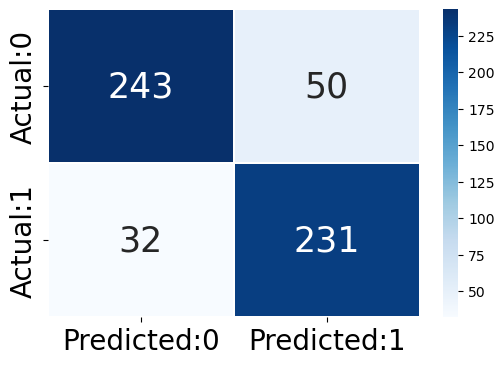

              precision    recall  f1-score   support

           0       0.88      0.83      0.86       293
           1       0.82      0.88      0.85       263

    accuracy                           0.85       556
   macro avg       0.85      0.85      0.85       556
weighted avg       0.85      0.85      0.85       556



In [139]:
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test.astype(int), y_pred.astype(int))
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
#sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap =['lightskyblue'],  linewidths = 0.1, annot_kws = {'size':20})
sns.heatmap(conf_matrix, annot = True, fmt = 'g', cmap ='Blues',  linewidths = 0.1, annot_kws = {'size':25}, )
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

print(classification_report(y_test.astype(int), y_pred.astype(int)))


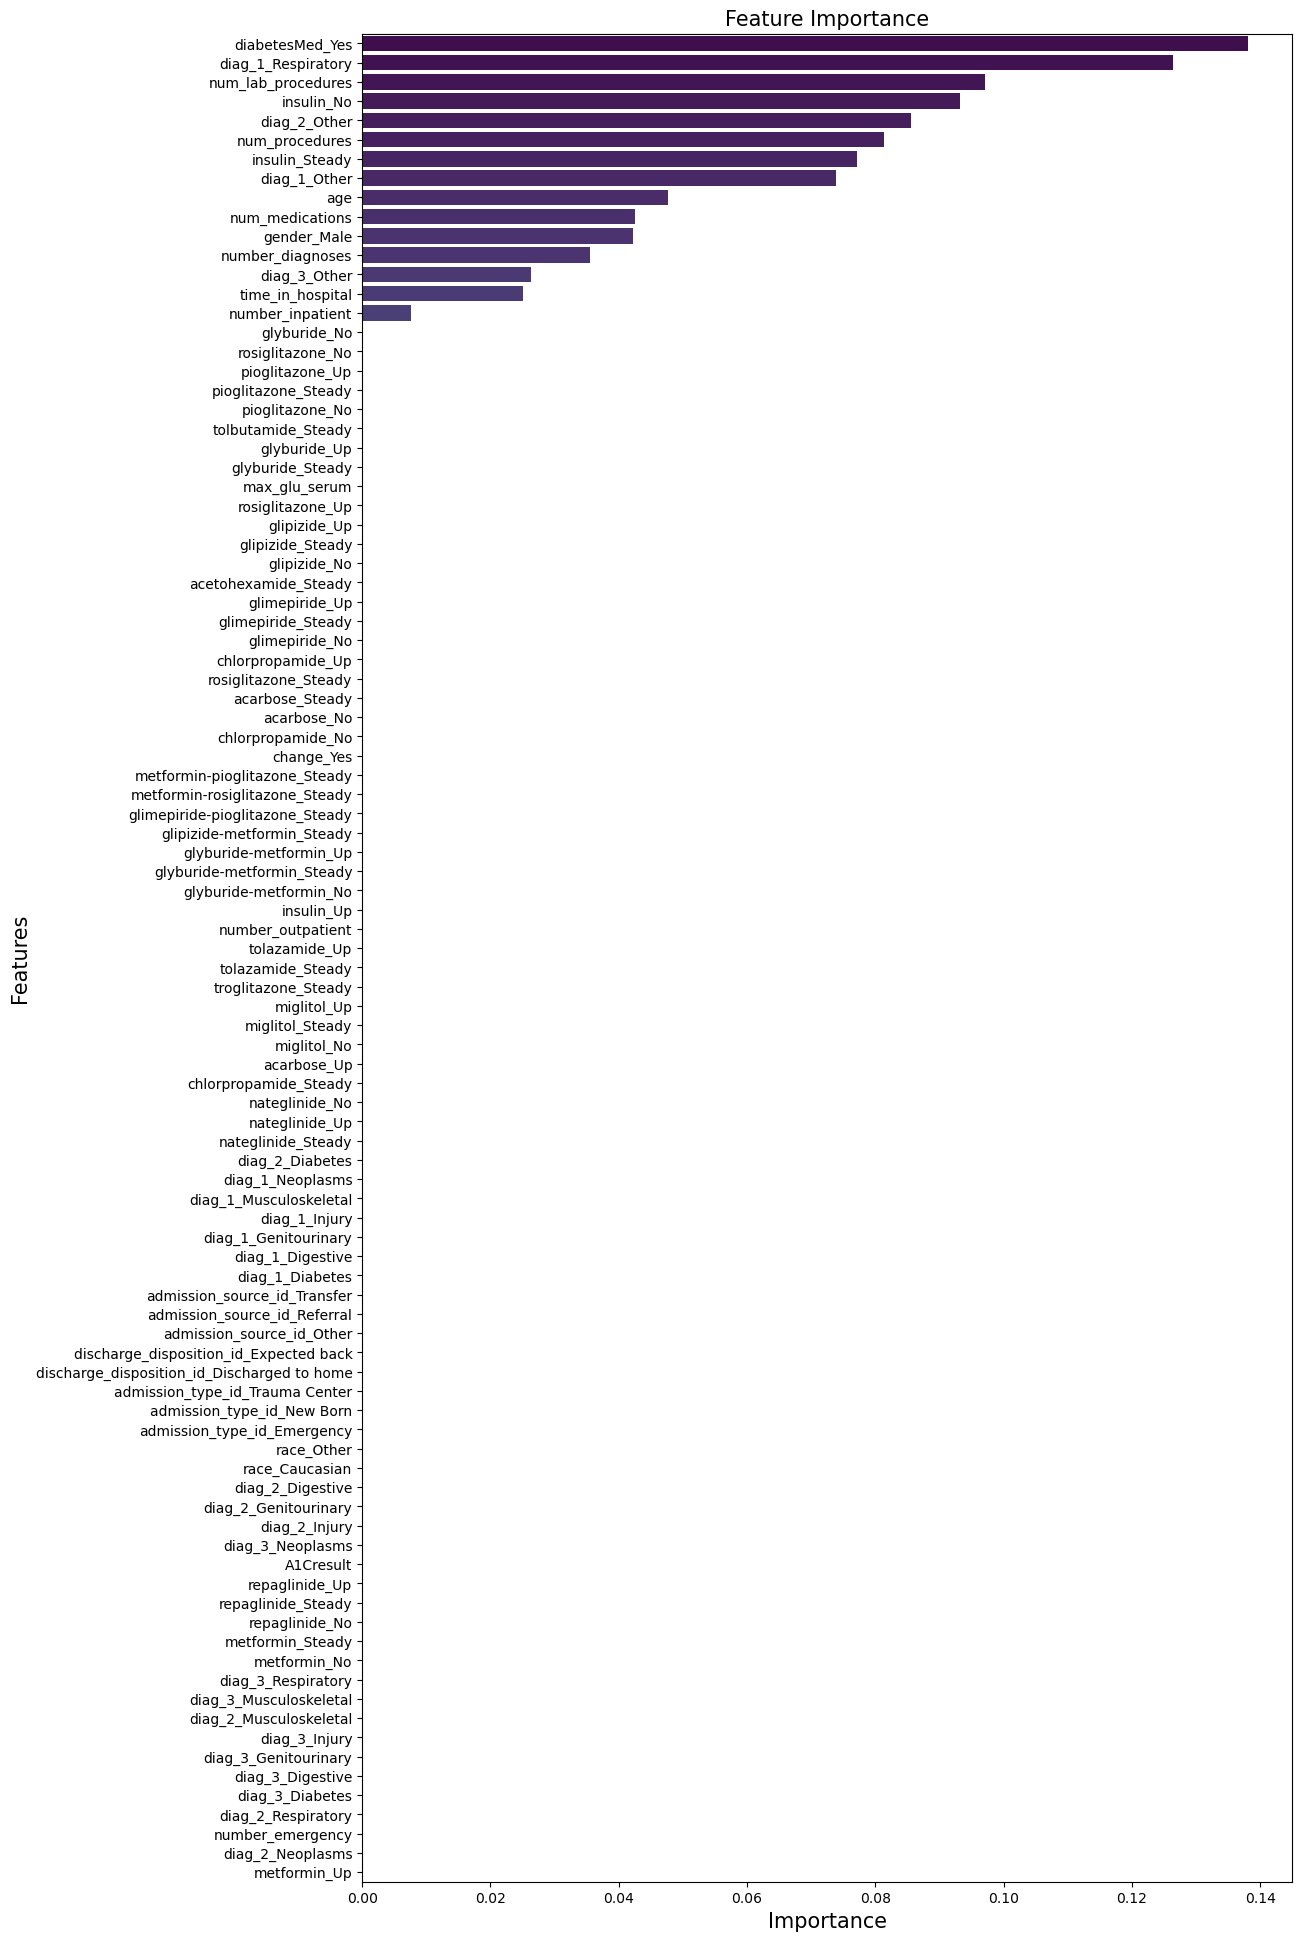

              Features  Importance
95     diabetesMed_Yes    0.138081
29  diag_1_Respiratory    0.126443
2   num_lab_procedures    0.097148
84          insulin_No    0.093255
36        diag_2_Other    0.085493
..                 ...         ...
38     diag_3_Diabetes    0.000000
37  diag_2_Respiratory    0.000000
6     number_emergency    0.000000
35    diag_2_Neoplasms    0.000000
48        metformin_Up    0.000000

[96 rows x 2 columns]


In [140]:
important_features = pd.DataFrame({'Features': X_train.columns,
                                   'Importance': GB.feature_importances_})



# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
plt.figure(figsize=(12,24))
sns.barplot(x = 'Importance', y = 'Features', data = important_features, palette='viridis')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

print(important_features)


In [141]:
y_proba=GB.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_curve, roc_auc_score
auc = roc_auc_score(y_test, y_proba)
print(f"AUC Score: {auc:.4f}")


AUC Score: 0.9355


In [142]:
name='GradientBoostingClassifier'
auc,accuracy,recall,precision, specificity = calc_scores(y_test,y_proba, thresh)
preval=calc_prev(y_test)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
Analysis[name] = {
    'auc_score':auc,
    'Accuracy': accuracy,
    'Recall':recall_score,
    'Precision':precision,
    'Specificity':specificity,
    'Prevalence':preval,
    'fpr':fpr,
    'tpr':tpr
    }

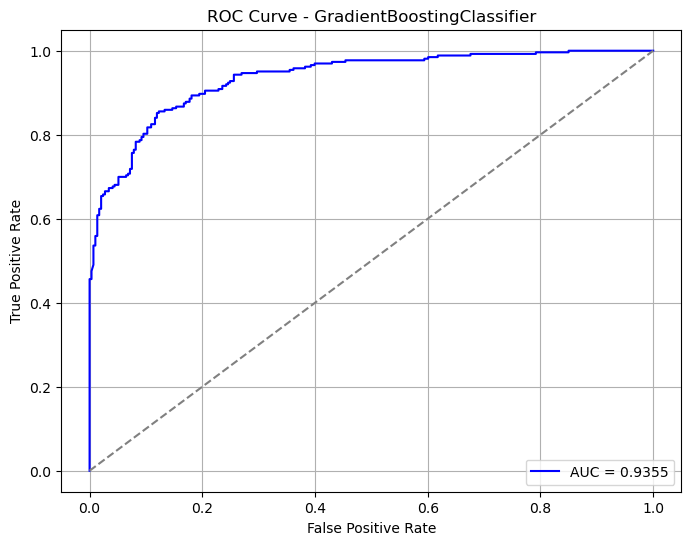

In [143]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve - " + name)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Decision Tree

In [144]:
df_model = pd.read_csv('diabetic_data_cleanedOH.csv')

X = df_model.drop('readmitted',axis=1)
y = df_model['readmitted']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

SC = StandardScaler()

X_train_scaled = pd.DataFrame(SC.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(SC.transform(X_test),columns=X_test.columns)

DT = DecisionTreeClassifier()
DT.fit(X_train_scaled,y_train)

y_pred = DT.predict(X_test)

confusion_matrix(y_test.astype(int), y_pred.astype(int))


array([[259,  17],
       [ 26,   1]], dtype=int64)

In [145]:
from sklearn.metrics import classification_report
print(classification_report(y_test.astype(int), y_pred.astype(int)))


              precision    recall  f1-score   support

           0       0.91      0.94      0.92       276
           1       0.06      0.04      0.04        27

    accuracy                           0.86       303
   macro avg       0.48      0.49      0.48       303
weighted avg       0.83      0.86      0.85       303



In [146]:
import imblearn
#Using SMOTE to handle Imbalanced Data.
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X,y = oversample.fit_resample(X,y)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

DT.fit(X_train,y_train)

DT.score(X_train,y_train),DT.score(X_test,y_test)

y_pred = DT.predict(X_test)

confusion_matrix(y_test.astype(int), y_pred.astype(int))



array([[242,  51],
       [ 22, 241]], dtype=int64)

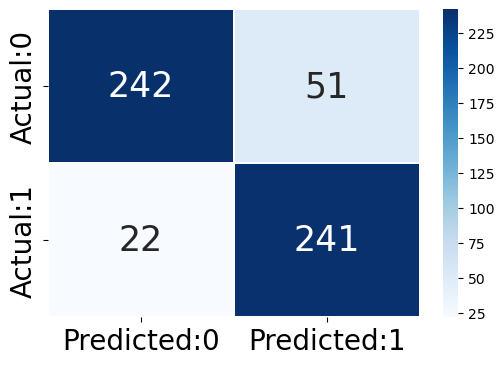

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       293
           1       0.83      0.92      0.87       263

    accuracy                           0.87       556
   macro avg       0.87      0.87      0.87       556
weighted avg       0.87      0.87      0.87       556



In [147]:
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test.astype(int), y_pred.astype(int))
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
#sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap =['lightskyblue'],  linewidths = 0.1, annot_kws = {'size':20})
sns.heatmap(conf_matrix, annot = True, fmt = 'g', cmap ='Blues',  linewidths = 0.1, annot_kws = {'size':25}, )
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

print(classification_report(y_test.astype(int), y_pred.astype(int)))


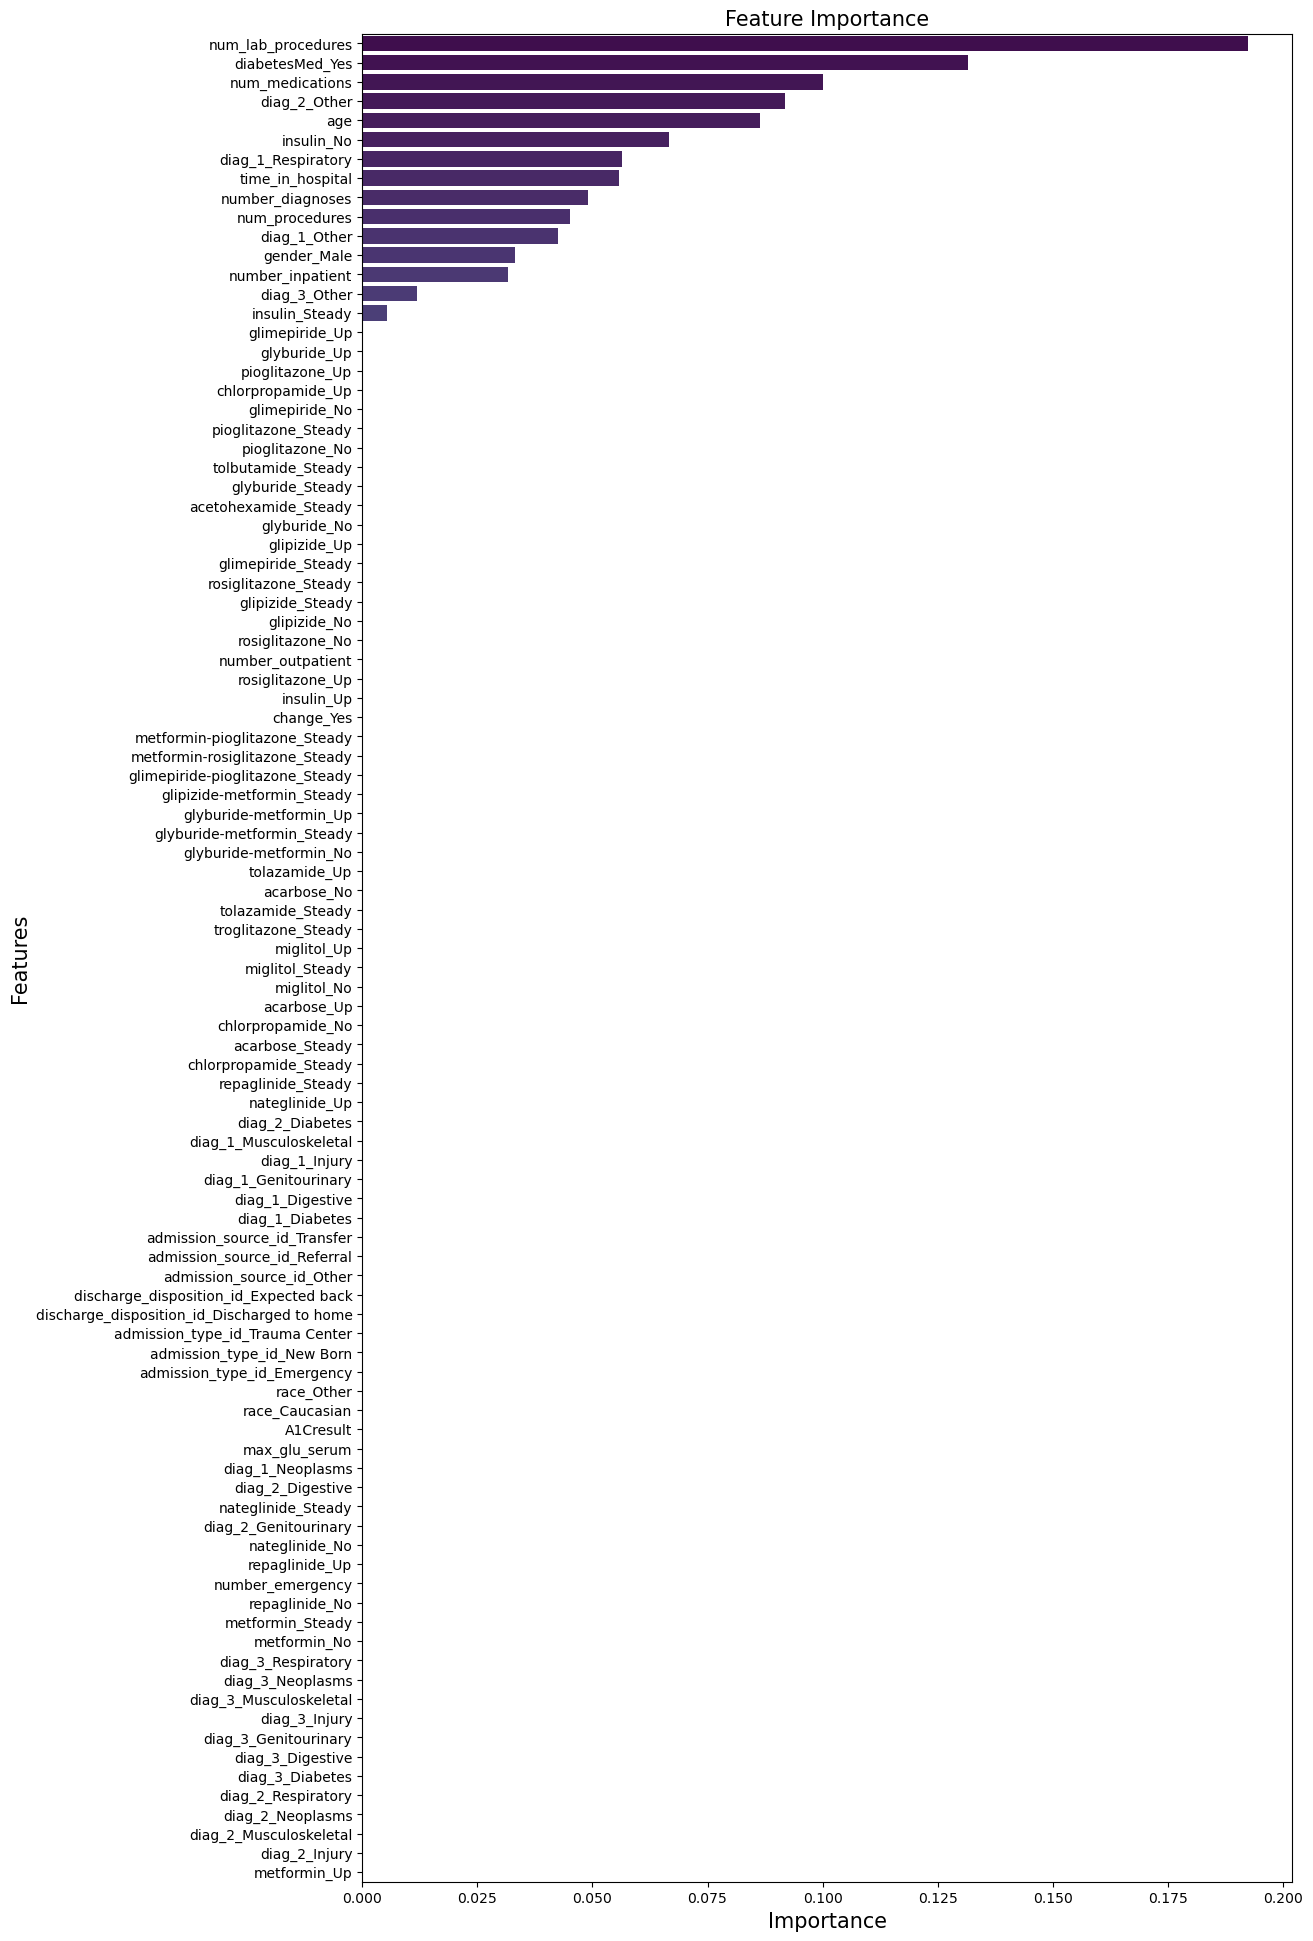

                  Features  Importance
2       num_lab_procedures    0.192351
95         diabetesMed_Yes    0.131553
4          num_medications    0.100108
36            diag_2_Other    0.091849
0                      age    0.086397
..                     ...         ...
37      diag_2_Respiratory    0.000000
35        diag_2_Neoplasms    0.000000
34  diag_2_Musculoskeletal    0.000000
33           diag_2_Injury    0.000000
48            metformin_Up    0.000000

[96 rows x 2 columns]


In [148]:
important_features = pd.DataFrame({'Features': X_train.columns,
                                   'Importance': DT.feature_importances_})



# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
plt.figure(figsize=(12,24))
sns.barplot(x = 'Importance', y = 'Features', data = important_features, palette='viridis')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

print(important_features)

In [149]:
y_proba=RF.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_curve, roc_auc_score
auc = roc_auc_score(y_test, y_proba)
print(f"AUC Score: {auc:.4f}")


AUC Score: 0.9722


In [150]:
name='DecisionTreeClassifier'
auc,accuracy,recall,precision, specificity = calc_scores(y_test,y_proba, thresh)
preval=calc_prev(y_test)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
Analysis[name] = {
    'auc_score':auc,
    'Accuracy': accuracy,
    'Recall':recall_score,
    'Precision':precision,
    'Specificity':specificity,
    'Prevalence':preval,
    'fpr':fpr,
    'tpr':tpr
    }

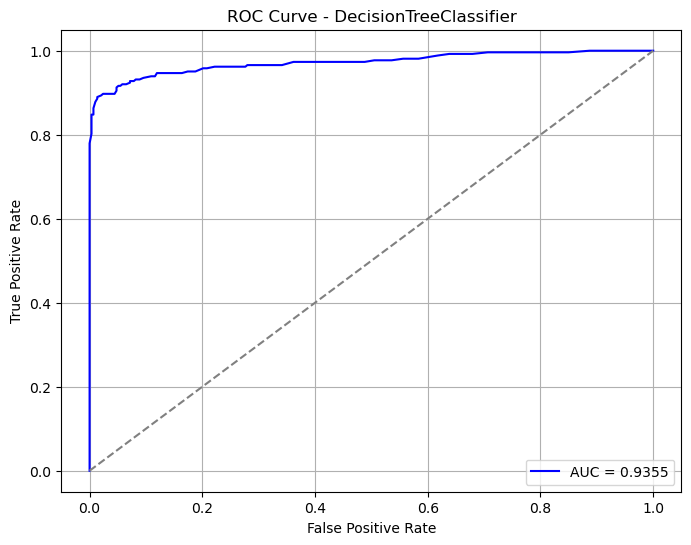

In [151]:
# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve - " + name)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# K Nearest Neighbors

In [152]:
df_model = pd.read_csv('diabetic_data_cleanedOH.csv')

X = df_model.drop('readmitted',axis=1)
y = df_model['readmitted']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

SC = StandardScaler()

X_train_scaled = pd.DataFrame(SC.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(SC.transform(X_test),columns=X_test.columns)

KN= KNeighborsClassifier()
KN.fit(X_train_scaled,y_train)

y_pred =KN.predict(X_test)

confusion_matrix(y_test.astype(int), y_pred.astype(int))

array([[276,   0],
       [ 27,   0]], dtype=int64)

In [153]:
from sklearn.metrics import classification_report
print(classification_report(y_test.astype(int), y_pred.astype(int)))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95       276
           1       0.00      0.00      0.00        27

    accuracy                           0.91       303
   macro avg       0.46      0.50      0.48       303
weighted avg       0.83      0.91      0.87       303



In [154]:
import imblearn
#Using SMOTE to handle Imbalanced Data.
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X,y = oversample.fit_resample(X,y)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

KN.fit(X_train,y_train)

KN.score(X_train,y_train),KN.score(X_test,y_test)

y_pred = KN.predict(X_test)

confusion_matrix(y_test.astype(int), y_pred.astype(int))


array([[190, 103],
       [  7, 256]], dtype=int64)

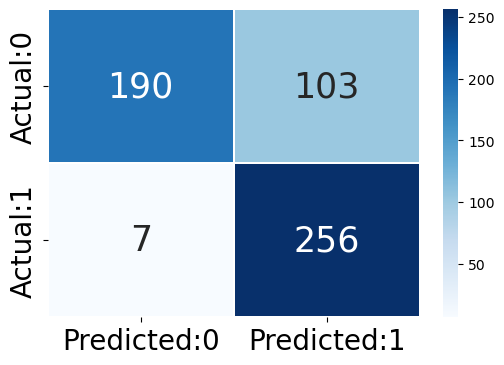

              precision    recall  f1-score   support

           0       0.96      0.65      0.78       293
           1       0.71      0.97      0.82       263

    accuracy                           0.80       556
   macro avg       0.84      0.81      0.80       556
weighted avg       0.85      0.80      0.80       556



In [155]:
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test.astype(int), y_pred.astype(int))
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
#sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap =['lightskyblue'],  linewidths = 0.1, annot_kws = {'size':20})
sns.heatmap(conf_matrix, annot = True, fmt = 'g', cmap ='Blues',  linewidths = 0.1, annot_kws = {'size':25}, )
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

print(classification_report(y_test.astype(int), y_pred.astype(int)))


In [156]:
y_proba=KN.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_curve, roc_auc_score
auc = roc_auc_score(y_test, y_proba)
print(f"AUC Score: {auc:.4f}")

AUC Score: 0.9150


In [157]:
name='KNeighborsClassifier'
auc,accuracy,recall,precision, specificity = calc_scores(y_test,y_proba, thresh)
preval=calc_prev(y_test)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
Analysis[name] = {
    'auc_score':auc,
    'Accuracy': accuracy,
    'Recall':recall_score,
    'Precision':precision,
    'Specificity':specificity,
    'Prevalence':preval,
    'fpr':fpr,
    'tpr':tpr
    }

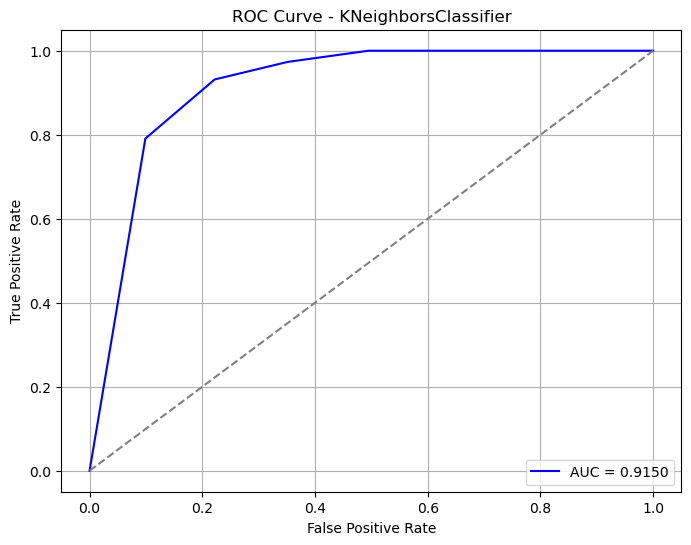

In [158]:
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve - " + name)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Analyzing the models

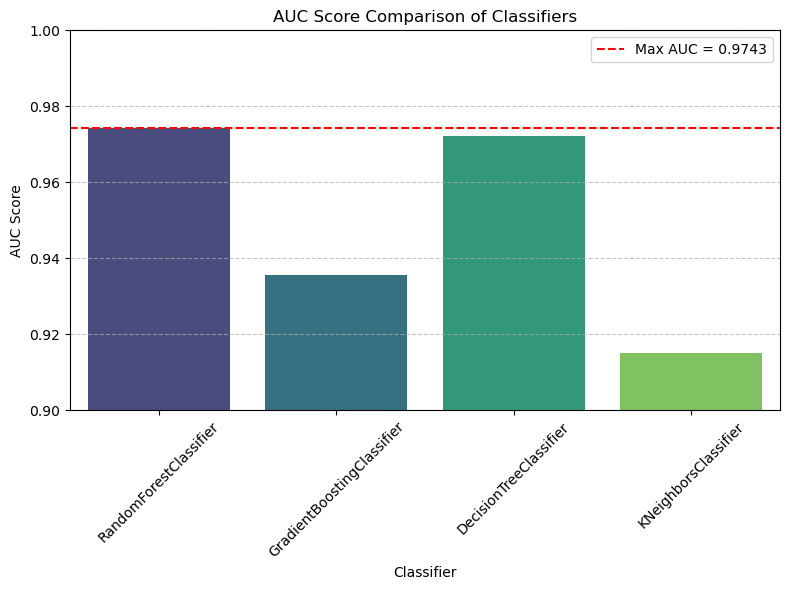

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_analysis = pd.DataFrame(Analysis).T.reset_index().rename(columns={'index': 'Classifier'})
max_auc = df_analysis['auc_score'].max()
# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=df_analysis, x='Classifier', y='auc_score', palette='viridis')

plt.title('AUC Score Comparison of Classifiers')
plt.ylabel('AUC Score')
plt.xlabel('Classifier')
plt.ylim(0.9, 1.0)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.axhline(y=max_auc, color='red', linestyle='--', linewidth=1.5, label=f'Max AUC = {max_auc:.4f}')
plt.legend()
plt.show()

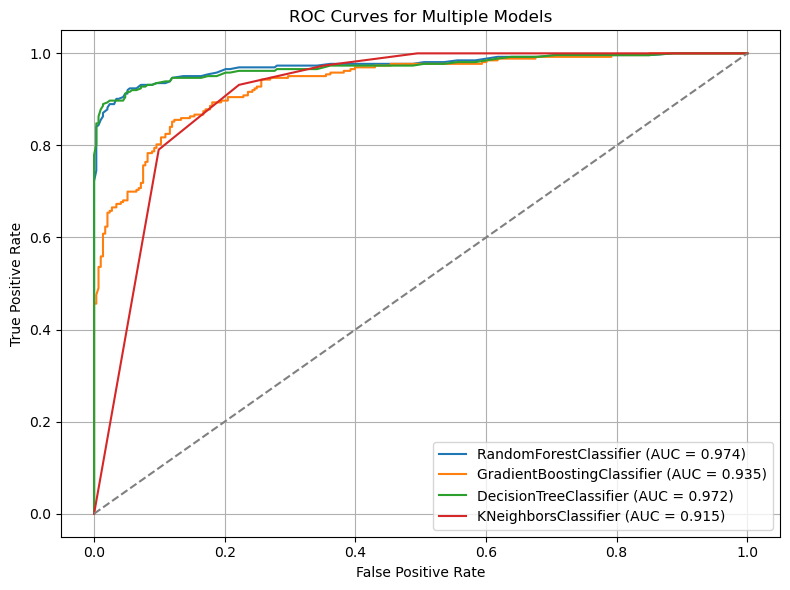

In [162]:

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for name, metrics in Analysis.items():
    fpr = metrics['fpr']
    tpr = metrics['tpr']
    auc = metrics['auc_score']
    
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")

# Diagonal reference line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title("ROC Curves for Multiple Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Model Saving
### Based on AUC, both Decision Tree and Random Forest are acceptable, and decided to take RF as the fitting model.

In [161]:
import pickle
RF.fit(X_train,y_train)

with open('Random.pkl', 'wb') as f:
    pickle.dump(RF, f)